# TALLER BÁSICO DE MANIPULACIÓN DE SEÑALES BIOMÉDICAS

## Bioseñales

Las señales que vamos a manipular son señales digitales que se obtienen a partir de procesos físicos, en nuestro caso producidos por el cuerpo humano, mediante un par de procesos: muestreo y cuantización. Esto implica que al final obtengamos un conjunto de puntos ordenados que representan la señal que generó el sistema físico

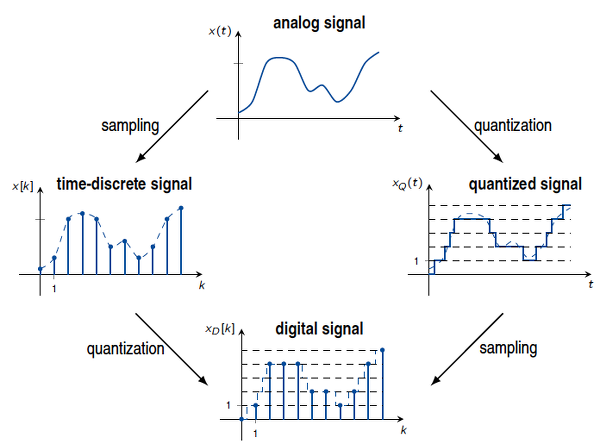

Los canales o sensores son los medios que permiten capturar el fenómeno físico, en este caso, la aparición de un voltaje

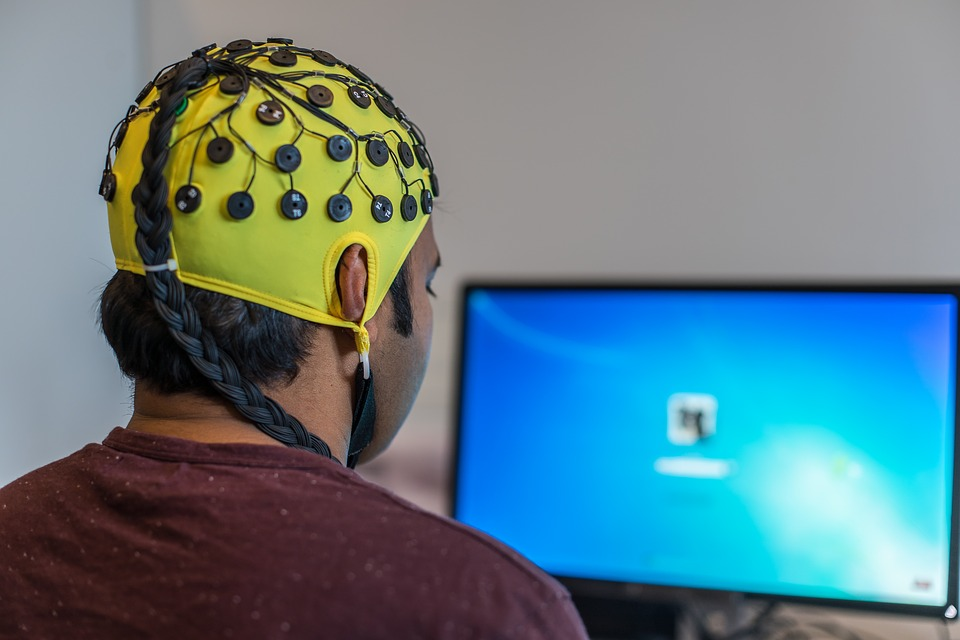

## Librerías básicas

Describir cada una de las librerías para que sirven, qué las caracteriza y consultar sobre las adicionales

In [2]:
import numpy as np; #para manejo de ndarray
import matplotlib.pyplot as plt; #graficar

import scipy.signal as signal;
import scipy.io as sio; #para cargar archivos

## Carga de archivos .mat

In [3]:
mat_contents = sio.loadmat('C001R_EP_reposo.mat') #cargamos los datos
print("the loaded keys are: " + str(mat_contents.keys())); #the data is loaded as a Python dictionary

the loaded keys are: dict_keys(['__header__', '__version__', '__globals__', 'data'])


In [4]:
#para recuperar los datos uso la llave
data = mat_contents['data'];
print("Variable python: " + str(type(data)));

Variable python: <class 'numpy.ndarray'>


### Atributos básicos

In [5]:
print("Dimensiones de los datos cargados: " + str(data.shape));
print("Tipo de variable: " + str(data.dtype));
print("Número de dimensiones: " + str(data.ndim));
print("Tamaño: " + str(data.size));
print("Tamanio en memoria (bytes): " + str(data.nbytes));

Dimensiones de los datos cargados: (8, 2000, 180)
Tipo de variable: float64
Número de dimensiones: 3
Tamaño: 2880000
Tamanio en memoria (bytes): 23040000


Cómo se podría convertir la señal a continua?

Cómo se podría verificar que la señal ha quedado bien convertida?

In [6]:
data1 = np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]),order='F')
print(data1.shape)

data2 = np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))

(8, 360000)


In [7]:
np.reshape?

In [8]:
resultado = data[0,:,0] - data1[0,0:2000]; # data1[0,:2000]
print(resultado)
print(np.sum(resultado))

resultado = data[0,:,0] - data2[0,0:2000]; # data1[0,:2000]
print(resultado)
print(np.sum(resultado))

[0. 0. 0. ... 0. 0. 0.]
0.0
[  0.           6.40323031  -1.38969231 ...  -7.49266505 -13.22853279
 -10.55618   ]
-1247.4691307561006


## Gráficación básica

Resolver punto en la diapositiva 8

Graficar la distribución o histograma de los puntos

Resolver los mismos puntos usando la interfaz de objetos de matplotlib

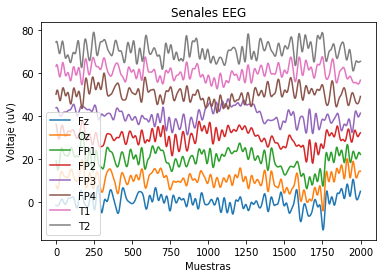

In [10]:
import matplotlib.pyplot as plt

canales = ['Fz', 'Oz', 'FP1', 'FP2', 'FP3', 'FP4','T1','T2']
for canal in range(data1.shape[0]):
    plt.plot(data1[canal,2000:4000] + canal*10, label=canales[canal])

plt.xlabel('Muestras')
plt.ylabel('Voltaje (uV)')
plt.title('Senales EEG')
plt.legend() #activar los label usados en el plot
plt.show()

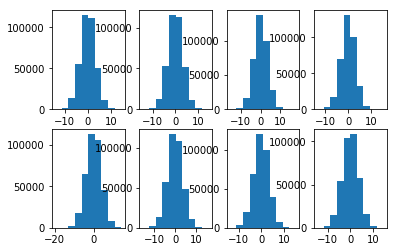

In [12]:
for canal in range(data1.shape[0]):
    plt.subplot(2,4,canal+1)
    plt.hist(data1[canal,:])
    

plt.show()

## Manipulación de señales

La señal P300 es una señal que se obtiene cuando una persona tiene que discriminar un estímulo infrecuente entre muchos frecuentes y que se registra en el EEG como un aumento en el voltaje en las condiciones infrecuentes respecto a las frecuentes alrededor de 300 ms luego de la presentación del estímulo.

La presencia, magnitud, topografía y duración de esta señal se utiliza a veces en la medición de la función cognitiva de los procesos de toma de decisiones.

![Plot-of-the-visual-P300-at-Cz-averaged-across-all-subjects.png](
Plot-of-the-visual-P300-at-Cz-averaged-across-all-subjects.png)
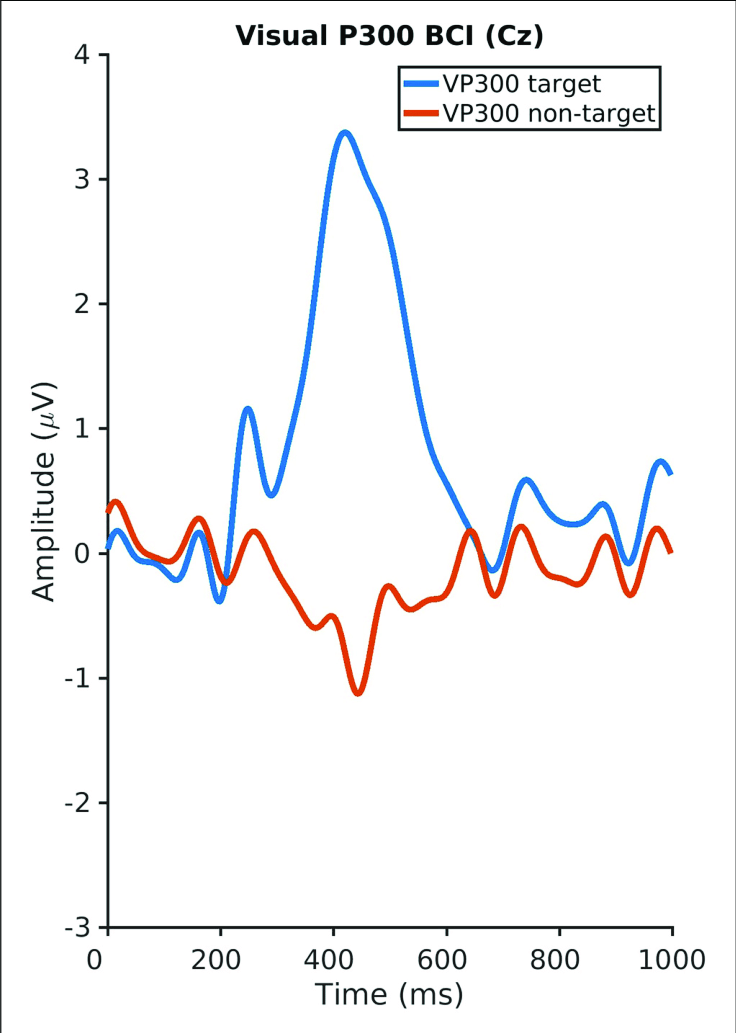

In [13]:
#loading data
mat_contents = sio.loadmat('senales_potencial.mat')
#the data is loaded as a Python dictionary
print("the loaded keys are: " + str(mat_contents.keys()));

the loaded keys are: dict_keys(['__header__', '__version__', '__globals__', 'frecuente', 'infrecuente'])


In [14]:
#in the current case the signal is stored in the data field
condicion_frecuente = mat_contents['frecuente'];
condicion_infrecuente = mat_contents['infrecuente'];

In [16]:
print("Dimensiones de los datos cargados frecuente: " + str(condicion_frecuente.shape));
print("Dimensiones de los datos cargados infrecuente: " + str(condicion_infrecuente.shape));

Dimensiones de los datos cargados frecuente: (58, 1150, 130)
Dimensiones de los datos cargados infrecuente: (58, 1150, 20)


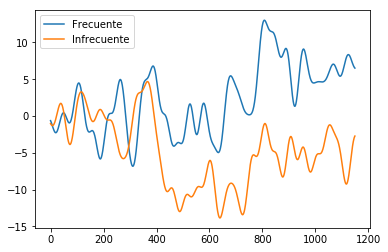

In [18]:
#graficar ensayo cero, canal 10, todos los puntos para frecuente e infrecuente
# Se explica todo lo que es la señal se hace un ejemplo de un solo ensayo para concluir que esto no da información determinante, por lo que se debe hacer un proedio que sera mas representativo.
plt.plot(condicion_frecuente[9,:,0],label='Frecuente')
plt.plot(condicion_infrecuente[9,:,0],label='Infrecuente')
plt.legend()
plt.show()

## Visualización del potencial


In [19]:
# Saco el promedio para ver el comportamiento de las señales de una manera mas deterministica
promedio_frecuentes = np.mean(condicion_frecuente,2)
promedio_infrecuentes = np.mean(condicion_infrecuente,2)

In [20]:
# Imprimo la forma para explicar lo que pasa al hacer el promedio 
print(promedio_frecuentes.shape)

(58, 1150)


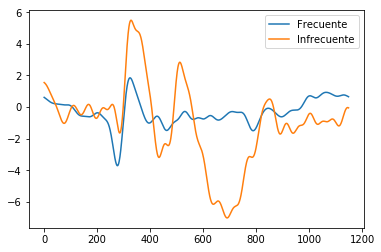

In [21]:
plt.plot(promedio_frecuentes[9,:],label='Frecuente')
plt.plot(promedio_infrecuentes[9,:],label='Infrecuente')
plt.legend()
plt.show()

## Estadística básica

In [23]:
#valor promedio de voltaje en los canales respetando los ensayos
promedio_frecuentes = np.mean(condicion_frecuente,1)
promedio_infrecuentes = np.mean(condicion_infrecuente,1)
print(promedio_frecuentes.shape)

(58, 130)


In [24]:
#valor promedio de voltaje en los canales respetando los ensayos
promedio_frecuentes = np.mean(promedio_frecuentes,1)
promedio_infrecuentes = np.mean(promedio_infrecuentes,1)
print(promedio_frecuentes.shape)

(58,)


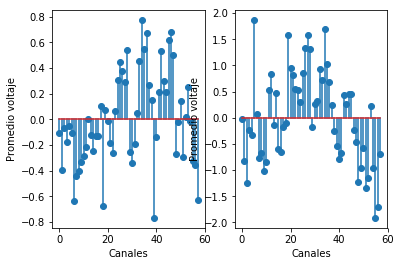

In [28]:
plt.subplot(1,2,1)
plt.stem(promedio_frecuentes)
plt.xlabel('Canales')
plt.ylabel('Promedio voltaje')
plt.subplot(1,2,2)
plt.stem(promedio_infrecuentes)
plt.xlabel('Canales')
plt.ylabel('Promedio voltaje')
plt.show()

(58,)
(58,)


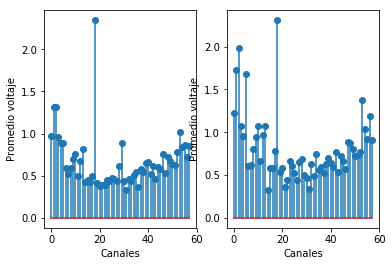

In [29]:
#valor promedio de voltaje en los canales respetando los ensayos
std_frecuentes = np.std(condicion_frecuente,1)
std_infrecuentes = np.std(condicion_infrecuente,1)
print(promedio_frecuentes.shape)

#valor promedio de voltaje en los canales respetando los ensayos
std_frecuentes = np.std(std_frecuentes,1)
std_infrecuentes = np.std(std_infrecuentes,1)
print(promedio_frecuentes.shape)

plt.subplot(1,2,1)
plt.stem(std_frecuentes)
plt.xlabel('Canales')
plt.ylabel('Promedio voltaje')
plt.subplot(1,2,2)
plt.stem(std_infrecuentes)
plt.xlabel('Canales')
plt.ylabel('Promedio voltaje')
plt.show()

Boxplot

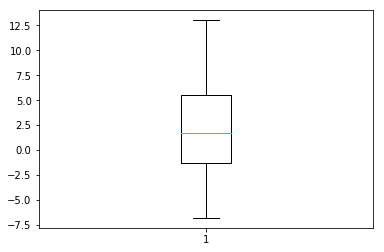

In [31]:
plt.boxplot(condicion_frecuente[9,:,0])
plt.show()

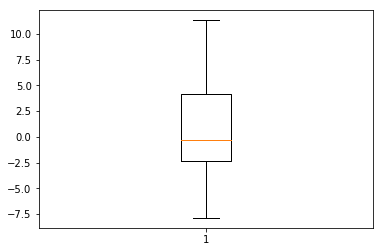

In [32]:
plt.boxplot(condicion_frecuente[9,:,10])
plt.show()